In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureEmodb_Ek_new.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966,0,6,3
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522,0,3,3
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692,0,1,3
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109,0,6,3
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264,1,2,16
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948,1,7,16
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342,1,7,16
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701,1,1,16


In [3]:
import joblib

# Load the saved scaler
scaler = joblib.load(main_dir + "scaler.pkl")

# Load the saved model
gender_model = tf.keras.models.load_model(main_dir + "gender_classification_model.h5")

In [4]:
# Keep only the first 193 columns
X_gender = data.iloc[:, :193].values

# Standardize features
X_scaled = scaler.transform(X_gender)

# Predict genders
gender_predictions = gender_model.predict(X_scaled)

17/17 [==============================] - 2s 6ms/step


In [5]:
print(gender_predictions)

[[9.2480648e-03]
 [4.2029869e-04]
 [1.4323965e-04]
 [1.8278761e-03]
 [6.4977130e-04]
 [6.5273972e-04]
 [2.9884977e-04]
 [3.4663724e-04]
 [2.4380509e-03]
 [1.6544455e-03]
 [1.1081801e-03]
 [7.5086439e-04]
 [2.0331861e-03]
 [4.9037644e-01]
 [3.5870115e-03]
 [1.0954255e-03]
 [1.0552050e-03]
 [1.0218736e-03]
 [1.6779796e-03]
 [2.3701896e-03]
 [1.0713245e-03]
 [2.1496089e-03]
 [1.6076656e-03]
 [4.5700828e-04]
 [1.0779733e-04]
 [2.2063102e-03]
 [1.4402701e-03]
 [1.0716098e-03]
 [1.0431295e-03]
 [1.0440203e-03]
 [4.9476898e-03]
 [6.8732365e-03]
 [2.2436311e-03]
 [9.3082810e-04]
 [3.0036133e-03]
 [1.6373729e-03]
 [9.3012332e-04]
 [1.5032422e-03]
 [4.3856855e-03]
 [1.7645982e-03]
 [7.8031659e-04]
 [3.5618369e-03]
 [6.1323488e-04]
 [3.0041530e-03]
 [2.6058932e-03]
 [3.1396528e-03]
 [1.4077091e-03]
 [1.5038016e-04]
 [3.3790196e-04]
 [9.9946511e-01]
 [9.9995184e-01]
 [9.9940270e-01]
 [9.9881279e-01]
 [9.9905705e-01]
 [9.9837720e-01]
 [9.9944329e-01]
 [9.9900138e-01]
 [9.9942303e-01]
 [9.9930358e-0

In [6]:
male_rows = gender_predictions.flatten() < 0.5  # True for Male, False for Female

df = data[male_rows]

print(f"Filtered dataset contains {df.shape[0]} male samples.")

Filtered dataset contains 232 male samples.


In [7]:
df.shape

(232, 196)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966,0,6,3
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522,0,3,3
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692,0,1,3
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109,0,6,3
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,-225.323318,107.318222,-54.203751,61.598076,-17.419870,20.989830,-25.045155,-0.421352,-10.304119,-16.766657,...,59.455596,-0.051994,-0.003146,-0.015737,-0.099566,-0.004473,-0.001898,0,5,15
460,-222.813461,140.969894,-22.877916,74.755981,-2.012127,25.562910,-2.754688,7.205434,-4.086431,-10.144965,...,55.796552,-0.009773,0.033598,0.096730,-0.038887,-0.009875,0.013777,0,2,15
461,-226.837311,142.118576,-28.414316,80.523026,1.455291,23.349869,0.228496,8.992689,-1.293387,-8.069052,...,55.246181,0.053525,0.008467,-0.028974,0.005422,-0.001764,0.008940,0,3,15
462,-230.787430,144.326324,-33.574013,81.690323,2.609222,19.189894,-1.268384,1.757590,-5.874588,-8.334718,...,54.868097,0.011599,0.028150,0.043454,-0.076144,-0.029873,-0.009483,0,3,15


In [9]:
data.iloc[:,-3] == 0 #male

0       True
1       True
2       True
3       True
4       True
       ...  
530    False
531    False
532    False
533    False
534    False
Name: gender, Length: 535, dtype: bool

In [10]:
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [11]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,14.751010,17.490223,16.878034,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,14.512919,17.550766,19.076122,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,16.131910,18.237524,19.299087,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,15.816742,17.617843,17.377833,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,14.601713,14.795569,19.625183,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,-225.323318,107.318222,-54.203751,61.598076,-17.419870,20.989830,-25.045155,-0.421352,-10.304119,-16.766657,...,15.536835,17.508150,18.547842,59.455596,-0.051994,-0.003146,-0.015737,-0.099566,-0.004473,-0.001898
460,-222.813461,140.969894,-22.877916,74.755981,-2.012127,25.562910,-2.754688,7.205434,-4.086431,-10.144965,...,14.436168,16.692528,19.409147,55.796552,-0.009773,0.033598,0.096730,-0.038887,-0.009875,0.013777
461,-226.837311,142.118576,-28.414316,80.523026,1.455291,23.349869,0.228496,8.992689,-1.293387,-8.069052,...,14.510448,16.331833,19.702384,55.246181,0.053525,0.008467,-0.028974,0.005422,-0.001764,0.008940
462,-230.787430,144.326324,-33.574013,81.690323,2.609222,19.189894,-1.268384,1.757590,-5.874588,-8.334718,...,14.435822,15.998726,21.182246,54.868097,0.011599,0.028150,0.043454,-0.076144,-0.029873,-0.009483


In [12]:
y

0      6
1      3
2      1
3      6
4      3
      ..
459    5
460    2
461    3
462    3
463    1
Name: emo, Length: 232, dtype: int64

In [12]:
X.shape, y.shape

((232, 193), (232,))

In [13]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [14]:
y1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
X.shape, y1.shape

((232, 193), (232, 7))

In [16]:
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [18]:
X2.shape, y2.shape

((232, 193), (232,))

In [17]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [18]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [19]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,14.751010,17.490223,16.878034,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,14.512919,17.550766,19.076122,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,16.131910,18.237524,19.299087,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,15.816742,17.617843,17.377833,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,14.601713,14.795569,19.625183,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,-225.323318,107.318222,-54.203751,61.598076,-17.419870,20.989830,-25.045155,-0.421352,-10.304119,-16.766657,...,15.536835,17.508150,18.547842,59.455596,-0.051994,-0.003146,-0.015737,-0.099566,-0.004473,-0.001898
228,-222.813461,140.969894,-22.877916,74.755981,-2.012127,25.562910,-2.754688,7.205434,-4.086431,-10.144965,...,14.436168,16.692528,19.409147,55.796552,-0.009773,0.033598,0.096730,-0.038887,-0.009875,0.013777
229,-226.837311,142.118576,-28.414316,80.523026,1.455291,23.349869,0.228496,8.992689,-1.293387,-8.069052,...,14.510448,16.331833,19.702384,55.246181,0.053525,0.008467,-0.028974,0.005422,-0.001764,0.008940
230,-230.787430,144.326324,-33.574013,81.690323,2.609222,19.189894,-1.268384,1.757590,-5.874588,-8.334718,...,14.435822,15.998726,21.182246,54.868097,0.011599,0.028150,0.043454,-0.076144,-0.029873,-0.009483


In [20]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=230
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    #print(a[i])

    model_name = 'Model_'+str(i)
    savedir='Emodb_gender_male'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Training set: 4 folds (80%)
    split4=np.concatenate((a[i%kfold],a[(i+1)%kfold],a[(i+2)%kfold],a[(i+3)%kfold]), axis=0)
    split4=np.sort(split4)
    X_train= X3.iloc[split4,:]
    y_train= y1[split4,:]

    # Testing set: 1 fold (20%)
    split1= np.sort(a[(i+4)%kfold])
    X_test = X3.iloc[split1,:]
    y_test = y1[split1,:]


    overlap_indices = np.intersect1d(split4, split1)
    if len(overlap_indices) > 0:
        print(f"⚠️ Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"✅ No overlap in fold {i}.")

    print(f"Fold {i} -> Train samples: {len(split4)}, Test samples: {len(split1)}")

    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs_train = y.iloc[split4]
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:10]   

    for i, idx in enumerate(fs_indices):
        print(f"Rank {i+1}: Feature {idx} - Score: {score[idx]:.4f}")
    

✅ No overlap in fold 0.
Fold 0 -> Train samples: 184, Test samples: 46
Rank 1: Feature 99 - Score: 192.0000
Rank 2: Feature 1 - Score: 191.0000
Rank 3: Feature 0 - Score: 190.0000
Rank 4: Feature 17 - Score: 189.0000
Rank 5: Feature 13 - Score: 188.0000
Rank 6: Feature 24 - Score: 187.0000
Rank 7: Feature 4 - Score: 186.0000
Rank 8: Feature 172 - Score: 185.0000
Rank 9: Feature 83 - Score: 184.0000
Rank 10: Feature 21 - Score: 183.0000
✅ No overlap in fold 1.
Fold 1 -> Train samples: 184, Test samples: 46
Rank 1: Feature 143 - Score: 192.0000
Rank 2: Feature 1 - Score: 191.0000
Rank 3: Feature 0 - Score: 190.0000
Rank 4: Feature 15 - Score: 189.0000
Rank 5: Feature 13 - Score: 188.0000
Rank 6: Feature 33 - Score: 187.0000
Rank 7: Feature 5 - Score: 186.0000
Rank 8: Feature 171 - Score: 185.0000
Rank 9: Feature 102 - Score: 184.0000
Rank 10: Feature 28 - Score: 183.0000
✅ No overlap in fold 2.
Fold 2 -> Train samples: 184, Test samples: 46
Rank 1: Feature 106 - Score: 192.0000
Rank 2: F

In [ ]:
### scores

In [34]:
sum=.0
for i in scores:sum+=i[1]

print(sum, sum/len(scores))

3.237603783607483 0.6475207567214966


In [47]:
scores

[[1.4199223518371582, 0.4655172526836395],
 [1.3555432558059692, 0.5245901346206665],
 [1.0535591840744019, 0.6811594367027283],
 [1.3914963006973267, 0.47887325286865234],
 [1.317863941192627, 0.5116279125213623]]

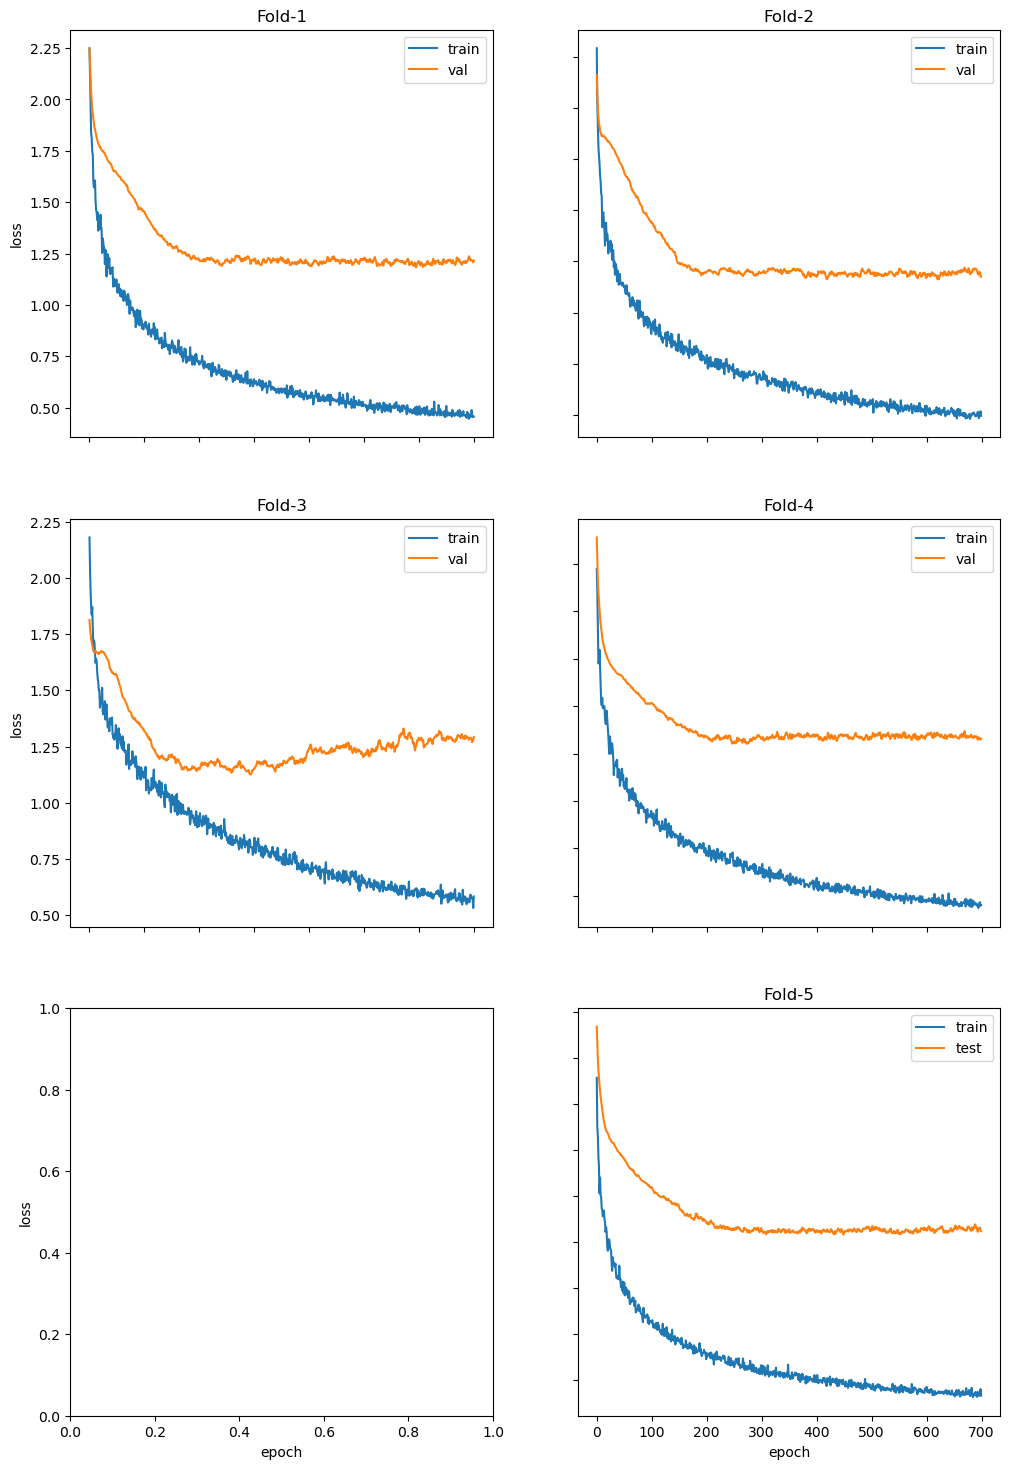

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [ ]:
### Model yükleme, gereksizse yapma

In [33]:
# loading json and creating model
from keras.models import model_from_json
savedir='Emodb_gender_male'
m='Model_4' # Infact female

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


Testing data from the same pool

In [34]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X4.npy')
yloaded=np.load(savedir+'/y4.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 80.43%


In [35]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

2/2 [==============================] - 0s 25ms/step
(46, 7)
46


array([[13,  0,  0,  1,  0,  1,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  1, 10,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1],
       [ 1,  0,  0,  0,  4,  0,  0],
       [ 3,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [36]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[ 86.7   0.    0.    6.7   0.    6.7   0. ]
 [  0.  100.    0.    0.    0.    0.    0. ]
 [  0.    8.3  83.3   0.    8.3   0.    0. ]
 [  0.    0.    0.   50.    0.    0.   50. ]
 [ 20.    0.    0.    0.   80.    0.    0. ]
 [ 42.9   0.    0.    0.    0.   57.1   0. ]
 [  0.    0.    0.    0.    0.    0.  100. ]]


         angry  bored  neutral  disgust  fear  happy    sad
angry     86.7    0.0      0.0      6.7   0.0    6.7    0.0
bored      0.0  100.0      0.0      0.0   0.0    0.0    0.0
neutral    0.0    8.3     83.3      0.0   8.3    0.0    0.0
disgust    0.0    0.0      0.0     50.0   0.0    0.0   50.0
fear      20.0    0.0      0.0      0.0  80.0    0.0    0.0
happy     42.9    0.0      0.0      0.0   0.0   57.1    0.0
sad        0.0    0.0      0.0      0.0   0.0    0.0  100.0



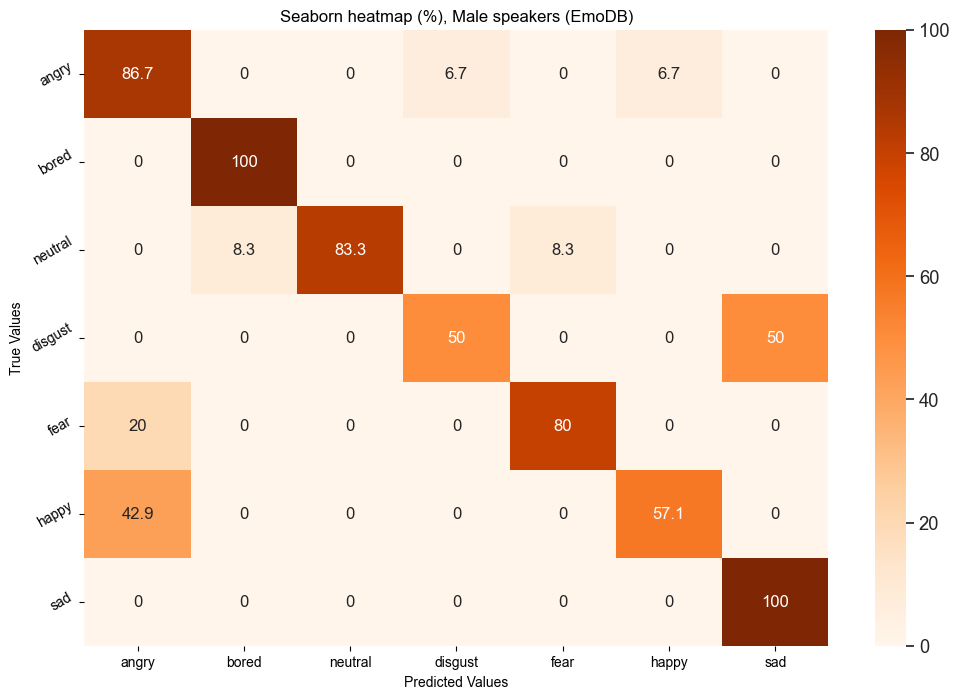

In [37]:
listik = ['angry', 'bored', 'neutral', 'disgust', 'fear', 'happy', 'sad']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), Male speakers (EmoDB)')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()